# Xiaoxiao ideas - [Issue #4](https://github.com/lucasbaldezzari/babesbayes-nma/issues/4)

**Performance accuracy in relation to reaction time.**
a. Measurement of Angles: Measure the angles between the selected arrow by subjects and the prior motion showed on screen (using the estimated x/y coordinates). We can set up a distribution of the deviation angles from the real orientation to represent the performance index or accuracy. Categorize the deviation angles into specific ranges, such as "0-5 degrees" and "5-10 degrees."

We can consider the following interpretations:

1. **Reaction Time as an Indicator of Attention**: 
2.  **Learning improvement over study session**
3. **Learning Strategy Adjustment**

#### Colaborators
- Xiaoxiao
- Lucas
- *Any other*

---

In [15]:
##importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, requests
from numpy import pi
import seaborn as sns

from utils import getAngles, get_cartesian_to_deg, limitingAngles

In [16]:
data = pd.read_csv("dataset\\data01_direction4priors.csv") ##open file

## Deleting some subjects

**DO NOT** use subject 2, it seems it has NaN values for almost all important rows. In the [Knowing_the_Data.ipynb](https://github.com/lucasbaldezzari/babesbayes-nma/blob/main/coding/Knowing_the_Data.ipynb) colab you can see in the *missing_values* variable that there are several NaN values for the columns 'response_arrow_start_angle', 'reaction_time' and 'raw_response_time'. In my opinion, we should not use the subjects 1, 2, 3 and 4.

So, I will drop all the rows for those subjects.

In [17]:
##delete the rows for subject_id 1, 2, 3 and 4
data = data[~data['subject_id'].isin([1,2,3,4])]
data["subject_id"].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## Processing the data and adding some columns

### 1 Adding *reaction_time_range*

In [18]:
data_processed = data.copy()

In [19]:
ranges = np.arange(0,data_processed.loc[:,"reaction_time"].max(),0.1).round(2)
# print(ranges)
data_processed.loc[:,"reaction_time_range"] = pd.cut(data_processed.loc[:,"reaction_time"], bins=ranges, labels=False)+1

if data_processed.loc[:,'reaction_time_range'].isnull().sum() > 0: ##deleting rows with NaN values
    data_processed = data_processed.dropna(subset=['reaction_time_range'])

indexes = data_processed.loc[:,'reaction_time_range'].value_counts().sort_index().index.astype(int) #get the sorted index
x_labels = np.round(ranges[indexes],1) #filtering the range values using the sorted indexes

## add a reaction_time_range_label column to the data_processed dataframe using the x_labels.
## Loop through the reaction_time_range column and get the corresponding x_labels value
data_processed.loc[:,"reaction_time_range_label"] = data_processed.loc[:,"reaction_time_range"].apply(lambda x: ranges[int(x)] if x < len(ranges) else 0)

In [20]:
print("The ranges in seconds are")
print(ranges)

The ranges in seconds are
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7]


### 2. Getting estimated angles

We will use two function to get the estimated angles, one using our approach and the Liquitaine approach.

In [21]:
x = data_processed['estimate_x'].values
y = data_processed['estimate_y'].values
##using estimate_x and estimate_y to calculate the angle using our function getAngles
data_processed.loc[:,'estimate_angles'] = np.round(getAngles(x, y, limits=360), 3)
##getting the difference between the motion direction and the estimate angles
data_processed.loc[:,'diff_angles'] = data_processed['motion_direction'] - data_processed['estimate_angles']
##limiting the angles to -180 and 180
data_processed.loc[:,'diff_angles_180'] = limitingAngles(data_processed.loc[:,'diff_angles'].values, bottom=-180, top=180)

##repeat the same but using get_cartesian_to_deg function
data_processed.loc[:,'estimate_angles_liqui'] = np.round(get_cartesian_to_deg(x, y, signed=True), 3)
data_processed.loc[:,'diff_angles_liqui'] = data_processed['motion_direction'] - data_processed['estimate_angles_liqui']
##limiting the angles to -180 and 180
data_processed.loc[:,'diff_angles_liqui_180'] = limitingAngles(data_processed.loc[:,'diff_angles_liqui'].values, bottom=-180, top=180)

Comparing the estimated angles we have just calculated.

In [22]:
data_processed.loc[:,['estimate_angles',"estimate_angles_liqui"]].describe()

,estimate_angles,estimate_angles_liqui
count,44870.000000,44870.000000
mean,209.131126,209.131126
std,69.471607,69.471607
min,0.033000,0.033000
25%,186.166750,186.166750
50%,221.209000,221.209000
75%,245.629000,245.629000
max,359.960000,359.960000


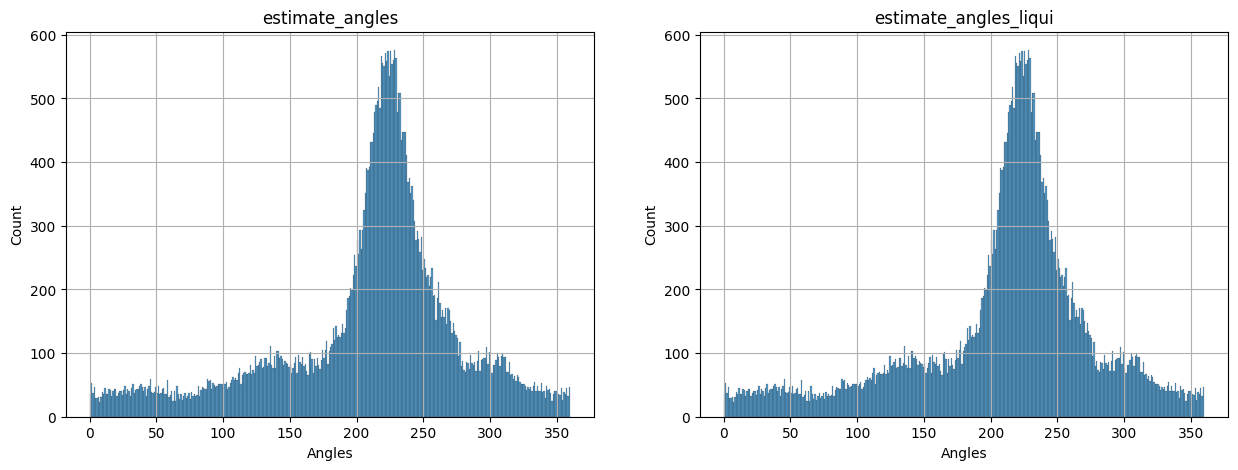

In [23]:
##histograms of estimate_angles and	estimate_angles_liqui
n_bins = 360
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=data_processed, x='estimate_angles', bins=n_bins, ax=ax[0])
sns.histplot(data=data_processed, x='estimate_angles_liqui', bins=n_bins, ax=ax[1])
ax[0].set_title("estimate_angles")
ax[1].set_title("estimate_angles_liqui")
ax[0].set_xlabel("Angles")
ax[1].set_xlabel("Angles")
ax[0].grid()
ax[1].grid()
plt.show()

It seems we have the same estimated angles from both functions.

Let's compare the difference angles between the motion direction and the estimated angles. 

In [24]:
data_processed.loc[:,['diff_angles',"diff_angles_180","diff_angles_liqui","diff_angles_liqui_180"]].describe()

,diff_angles,diff_angles_180,diff_angles_liqui,diff_angles_liqui_180
count,44870.000000,44870.000000,44870.000000,44870.000000
mean,7.880017,0.803574,7.880017,0.803574
std,69.571051,52.201040,69.571051,52.201040
min,-354.804000,-179.964000,-354.804000,-179.964000
25%,-18.547000,-20.546000,-18.547000,-20.546000
50%,1.610000,0.212000,1.610000,0.212000
75%,23.549000,20.790000,23.549000,20.790000
max,354.843000,179.935000,354.843000,179.935000


In [25]:
##getting the interquartile range for the diff_angles, diff_angles_180, diff_angles_liqui, diff_angles_liqui_180
q1 = data_processed.loc[:,['diff_angles',"diff_angles_180","diff_angles_liqui","diff_angles_liqui_180"]].quantile(0.25)
q3 = data_processed.loc[:,['diff_angles',"diff_angles_180","diff_angles_liqui","diff_angles_liqui_180"]].quantile(0.75)
iqr = q3 - q1
print("Interquartile range for diff_angles, diff_angles_180, diff_angles_liqui, diff_angles_liqui_180")
print(iqr)


Interquartile range for diff_angles, diff_angles_180, diff_angles_liqui, diff_angles_liqui_180
diff_angles              42.096
diff_angles_180          41.336
diff_angles_liqui        42.096
diff_angles_liqui_180    41.336
dtype: float64


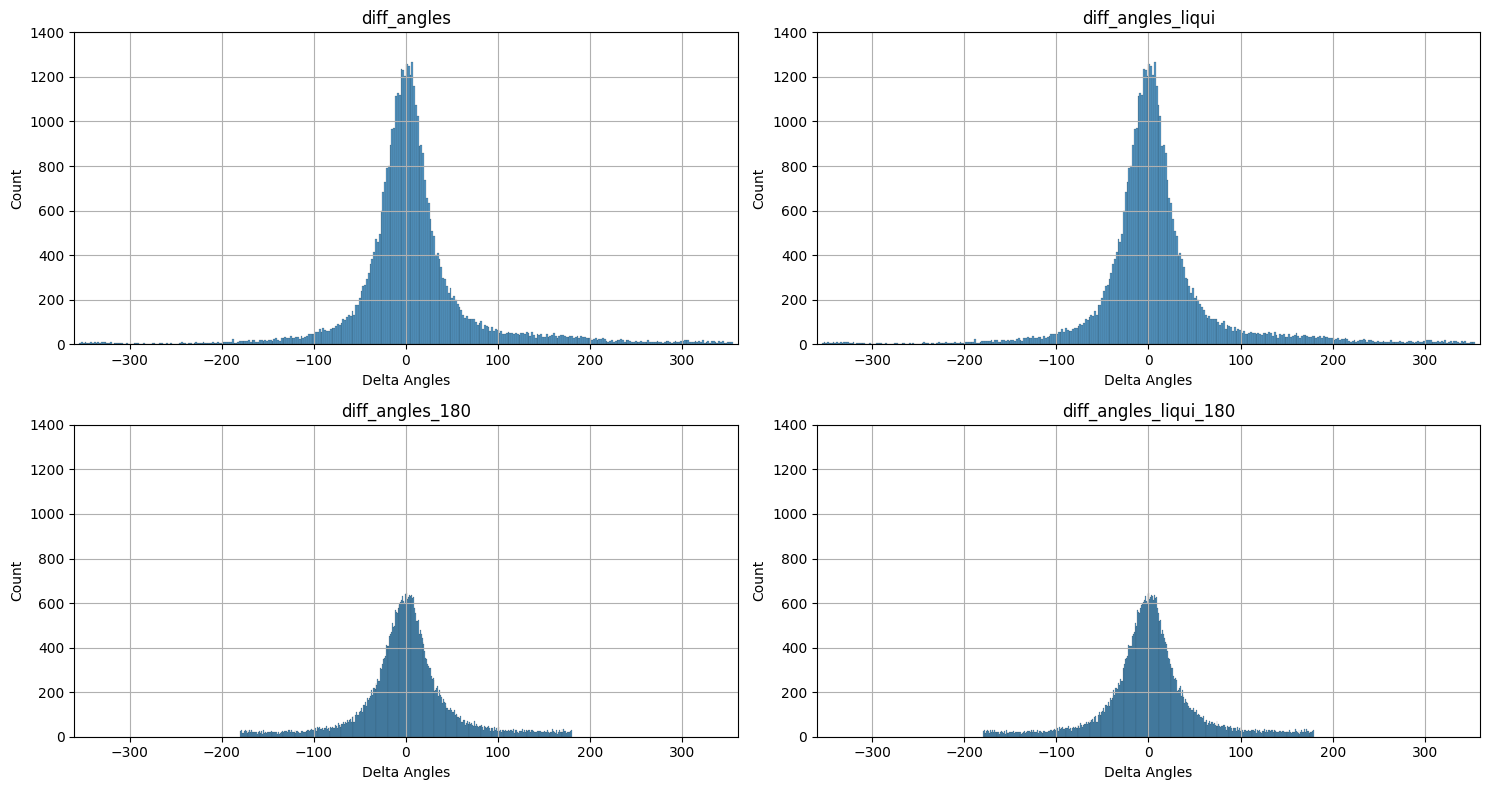

In [26]:
##histograms of estimate_angles and	estimate_angles_liqui
n_bins = 360
fig, ax = plt.subplots(2,2, figsize=(15,8))
sns.histplot(data=data_processed, x='diff_angles', bins=n_bins, ax=ax[0,0])
sns.histplot(data=data_processed, x='diff_angles_liqui', bins=n_bins, ax=ax[0,1])
sns.histplot(data=data_processed, x='diff_angles_180', bins=n_bins, ax=ax[1,0])
sns.histplot(data=data_processed, x='diff_angles_liqui_180', bins=n_bins, ax=ax[1,1])
ax[0,0].set_title("diff_angles")
ax[0,1].set_title("diff_angles_liqui")
ax[0,0].set_xlabel("Delta Angles")
ax[0,1].set_xlabel("Delta Angles")
ax[1,0].set_title("diff_angles_180")
ax[1,1].set_title("diff_angles_liqui_180")
ax[1,0].set_xlabel("Delta Angles")
ax[1,1].set_xlabel("Delta Angles")
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()
##limitting the x axes to -360 and 360 and the y axes to 0 and 1400
for i in range(2):
    for j in range(2):
        ax[i,j].set_xlim(-360,360)
        ax[i,j].set_ylim(0,1400)

##tight layout
plt.tight_layout()
plt.show()

Again, apparently the angles are the same for both functions.

In [31]:
# print(data_processed.head())

#### Saving the data

In [27]:
##saving the new data
data_processed.to_csv("dataset\data_processed.csv")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\corre\AppData\Local\Temp\ipykernel_12056\568595744.py:2: SyntaxWarning: invalid escape sequence '\d'
  data_processed.to_csv("dataset\data_processed.csv")


### Columns added

- reaction_time_range: Discrete numbers for reaction time ranges.
- reaction_time_range_label: Label (in seconds) for the reaction time range.
- estimate_angles: Estimated angles using estimate_x and estimate_y. Using $angle = (arctan(frac{y}{x})\times\frac{180}{\pi}) \% 360$
- diff_angles: Difference between *motion_direction* and *estimate_angles* using 

### Difference between motion and estimated angles divided by prior_std

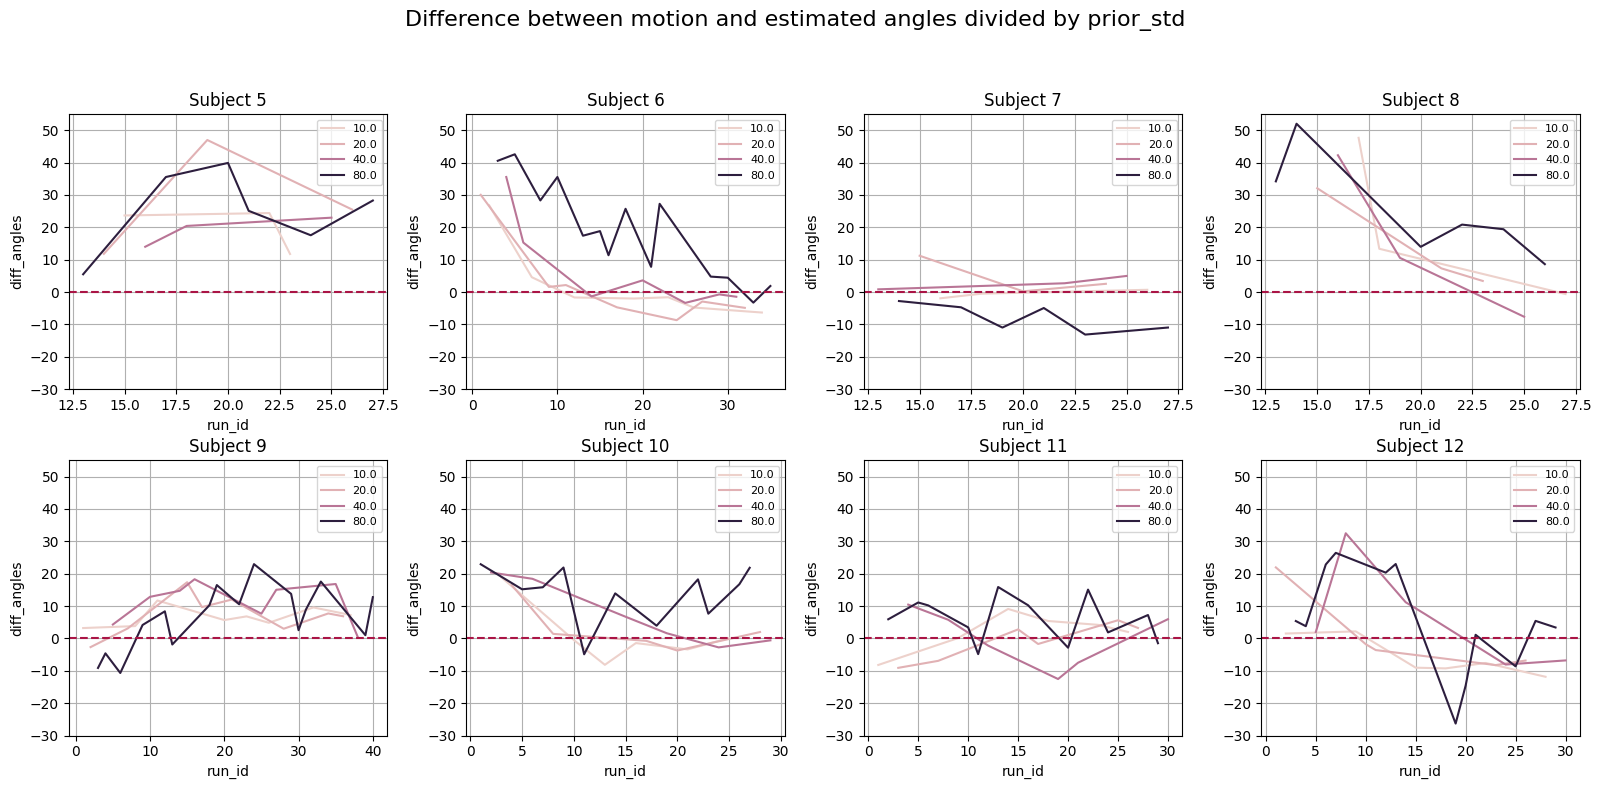

In [28]:
interest_cols = ["motion_direction","estimate_angles","diff_angles","prior_std"]
rows = 2
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(16, 8))
subjects = data_processed["subject_id"].unique()
accum = 0
for i in range(rows):
    for j in range(cols):
        ##grouping the data by run_id for each subject
        temp_data = data_processed[data_processed["subject_id"] == subjects[accum]]
        grups = temp_data.groupby("run_id")[interest_cols].mean()
        sns.lineplot(grups, x = grups.index ,y="diff_angles", hue = "prior_std",ax=axs[i,j])
        axs[i,j].set_title(f"Subject {subjects[accum]}") 
        accum += 1
        ##adding a horizontal line at 0
        axs[i,j].axhline(0, color="#aa1445", linestyle="--")
        ##fontsize of legend in 8
        axs[i,j].legend(fontsize=8)
        ##limit the y-axis to -15 and 55
        axs[i,j].set_ylim(-30,55)
        ##grid on
        axs[i,j].grid()
plt.tight_layout()
##general title
plt.suptitle("Difference between motion and estimated angles divided by prior_std", fontsize=16)
##adding space between the subplots
plt.subplots_adjust(top=0.85)
plt.show()